In [1]:
from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import SymLogNorm, Normalize
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from matplotlib.offsetbox import AnchoredText

import matplotlib as mpl

In [2]:
true_obj = {}
false_obj = {}

min_diam = np.loadtxt('est_diameter_min.csv')
max_diam = np.loadtxt('est_diameter_max.csv')
miss_dist = np.loadtxt('miss_distance.csv')

rel_vel = np.loadtxt('relative_velocity.csv')
abs_mag = np.loadtxt('absolute_magnitude.csv')
hazardous = np.loadtxt('hazardous.csv', dtype = '<U16')

In [3]:
size = 90836
data = np.zeros((size, 2))

data[:,0] = miss_dist
data[:,1] = abs_mag
print(data[hazardous == 'TRUE', 0])
print(data[hazardous == 'FALSE', 0].size)

[61438126.52  46275567.    38337496.95  ... 71898350.23  47566265.3
  8894221.832]
81996


(8.031500000000001, 34.398500000000006)
(-3732849.7633582004, 78538246.7458742)


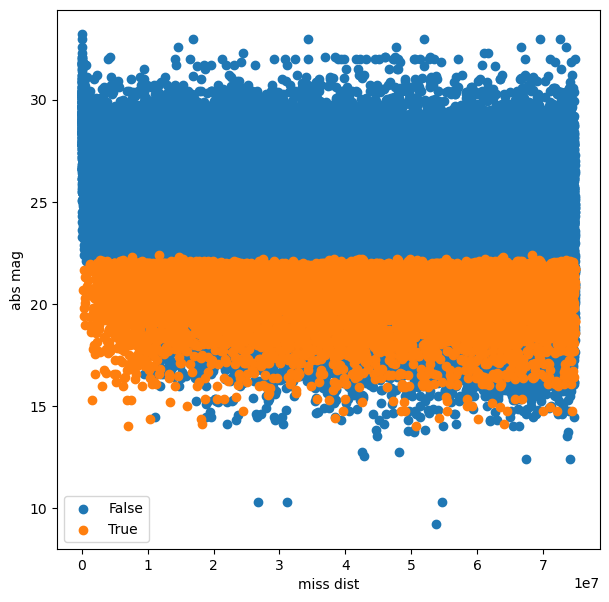

In [14]:
fig, ax = plt.subplots(figsize =(7,7))

ax.scatter(data[hazardous=='FALSE',0], data[hazardous=='FALSE',1], label = 'False')
ax.scatter(data[hazardous=='TRUE',0], data[hazardous=='TRUE',1], label = 'True')

ax.set_xlabel(f'miss dist')
ax.set_ylabel(f'abs mag')

# ax.set_ylim(-50000,1000000)
print(ax.get_ylim())
print(ax.get_xlim())
ax.legend()

In [15]:
x1, x2 = np.meshgrid(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 1000000),
                          np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 1))

X_pred = np.zeros((len(x1.reshape(-1,1)), 2))
X_pred[:,0] = x1.flatten()
X_pred[:,1] = x2.flatten()

print(x1.shape, X_pred.shape, X_pred[:,0].shape)

(27, 83) (2241, 2) (2241,)


In [16]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
from sklearn.tree import DecisionTreeClassifier
depth = 10
tree = DecisionTreeClassifier(max_depth  = depth)
    
tree.fit(data, hazardous)

preds = tree.predict(X_pred)
print(np.any(preds == 'TRUE'))

True


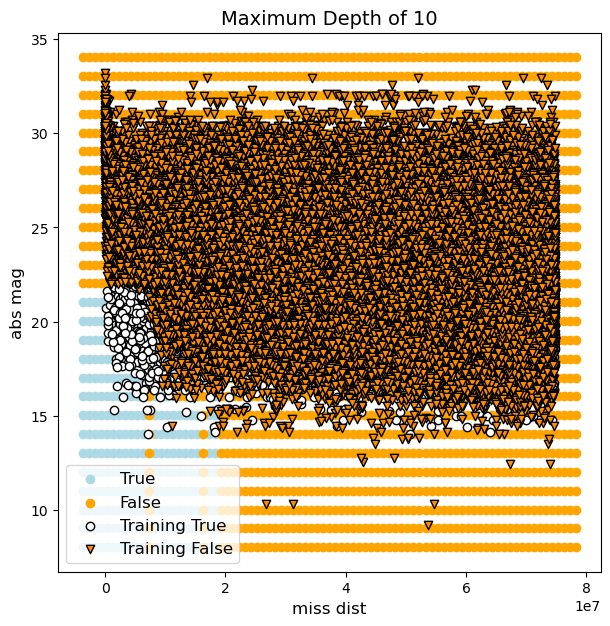

In [21]:
fig, ax = plt.subplots(figsize =(7,7))

ax.scatter(X_pred[preds=='TRUE',0],
            X_pred[preds=='TRUE',1],
            c='lightblue',
          label = 'True')

ax.scatter(X_pred[preds=='FALSE',0],
            X_pred[preds=='FALSE',1],
            c='orange',
          label = 'False')

ax.scatter(data[hazardous=='TRUE',0], 
            data[hazardous=='TRUE',1],
            label='Training True',
            c = 'white',
            edgecolor='black')
ax.scatter(data[hazardous=='FALSE',0], 
            data[hazardous=='FALSE',1],
            label='Training False',
            c = 'darkorange',
            marker='v',
            edgecolor='black')

plt.title("Maximum Depth of " + str(depth), fontsize=14)
plt.xlabel("miss dist", fontsize=12)
plt.ylabel("abs mag", fontsize=12)
plt.legend(fontsize=12)

plt.show()